# Exercício 1

A matriz $X$ é:

$$
X = \begin{bmatrix} 1.5 & -1 \\ 0 & 0.5 \end{bmatrix}
$$

O vetor-coluna $v$ é:
$$
v = \begin{bmatrix} 1 \\ 1 \end{bmatrix}
$$

$v$ é um auto-vetor de $X$? Justifique sua resposta!

### Explicação

Autovetores são vetores que, quando multiplicados por uma matriz, resultam em um múltiplo do próprio vetor.

Desta maneira, para verificar se $v$ é um autovetor de $X$, basta multiplicar $X$ por $v$ e verificar se o resultado é um múltiplo de $v$.
Neste caso, o resultado desta multiplicação é:

$$
\begin{bmatrix} 1.5 & -1 \\ 0 & 0.5 \end{bmatrix} \begin{bmatrix} 1 \\ 1 \end{bmatrix} = \begin{bmatrix} 0.5 \\ 0.5 \end{bmatrix}
$$

Logo, nota-se que o resultado (múltiplo do próprio autovetor) é um múltiplo de $v$, portanto, $v$ é um autovetor de $X$.

In [14]:
import numpy as np

x = np.array([[1.5, -1], [0, 0.5]])
v = np.array([1,1])

print(x @ v)

[0.5 0.5]


In [1]:
import numpy as np
P = np.array([[1, 0], [1, 1]]).T
Q = np.diag([1.5, 0.5])
X = P @ Q @ np.linalg.inv(P)
print(X)
v, w = np.linalg.eig(X)
print(v)
print(w)

V = np.array([[1, 1]]).T
print(X @ V)

[[ 1.5 -1. ]
 [ 0.   0.5]]
[1.5 0.5]
[[1.         0.70710678]
 [0.         0.70710678]]
[[0.5]
 [0.5]]


# Exercício 2

Analise o código abaixo. 

Por que o terceiro painel mostra uma imagem igual à do primeiro painel?

In [20]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

# Carregando imagem inicial
A = mpimg.imread("smile.jpg").mean(axis=2) # Convertendo para preto e branco

# Construindo matriz de recuperacao
N = A.shape[0] * A.shape[1]
P = np.random.randn(N, N)
P[:,0] = A.reshape( (-1,) )
Q = np.ones(N) * 0.9
Q[0] = 1
Q = np.diag(Q)
X = P @ Q @ np.linalg.inv(P)

# Criando imagem puramente ruidosa
B = np.random.random(A.shape)

# Aplicando matriz de recuperacao
C = B.reshape( (-1, 1) )
for _ in range(100):
    C = X @ C
C = C.reshape(A.shape)

# Plotando imagem inicial, ruidosa e recuperada
plt.figure()
plt.subplot(1,3,1)
plt.imshow(A, cmap='gray')
plt.title('Original')
plt.subplot(1,3,2)
plt.imshow(B, cmap='gray')
plt.title('Entrada')
plt.subplot(1,3,3)
plt.imshow(C, cmap='gray')
plt.title('Recuperada')
plt.show()

[[255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]]
2500
[[-0.84704432  0.58955808 -1.12683238 ...  1.83492148  0.33302232
  -0.73601349]
 [-1.79964586 -0.65195047  0.31586018 ...  0.16754888 -0.14517175
  -0.57376516]
 [ 0.05205781  2.02122199  1.76954626 ... -0.310657    0.46918089
   1.3263703 ]
 ...
 [-1.24751757  0.5562948  -0.2251645  ...  0.77083767  0.20520075
  -0.91959307]
 [-0.98358148  0.83419054  0.93172919 ...  1.37369086 -0.40183752
   0.37330297]
 [ 0.82929651 -0.58438606 -0.35809083 ... -0.36485367  1.59061939
   0.51205418]]


# Exercício 3

O código abaixo busca contar palavras únicas em um texto (o texto, neste caso, é o clássico livro "Moby Dick"). Contar palavras únicas significa contar quantas palavras diferentes existem em um texto - por exemplo, "ESTE TEXTO É UM TESTE" tem 5 palavras únicas, ao passo que "ESTE TEXTO É UM TEXTO" tem 4 palavras únicas.

A maneira que a função funciona é manter uma lista com todas as palavras que já foram vistas. Daí, para cada nova palavra, verificamos se ela já existe na nossa lista. Caso não exista, adicionamos a palavra, e, ao fim do processo, retornamos o tamanho dessa lista de palavras já vistas.

O problema do código é que verificar se uma palavra está em uma lista envolve varrer a lista inteira, o que, para um texto de $N$ palavras, pode levar $N$ iterações. Como fazemos isso $N$ vezes (uma para cada palavra do texto), então temos um algoritmo que executa em tempo quadrático, isto é, $O(N^2)$.

Como o tempo de execução do algoritmo cresce muito rapidamente com o aumento do número de palavras do texto, demora muito para contar palavras únicas no texto inteiro de Moby Dick. Porém, podemos medir o tempo de execução para apenas as primeiras palavras do texto.

Como sabemos que o tempo $t$ de execução do algoritmo para $N$ palavras é um polinômio de segundo grau, então:

$
t = A N^2 + BN + C,
$

use os dados da execução do teste abaixo no seu computador para fazer uma regressão usando autograd, encontre $A$, $B$ e $C$, e estime quanto tempo levaria para este algoritmo contar as palavras de todo o texto de Moby Dick.

100%|██████████| 27/27 [00:05<00:00,  5.37it/s]


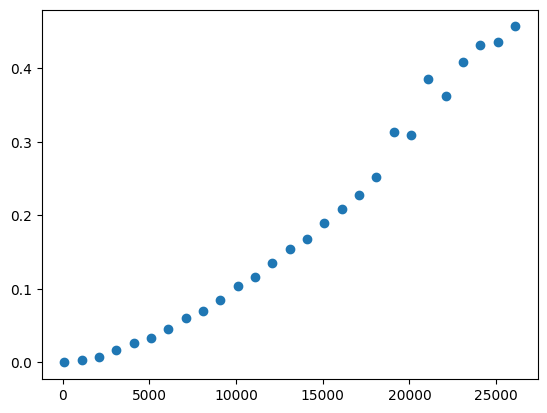

In [39]:
import urllib.request
import time
import matplotlib.pyplot as plt
from tqdm import tqdm

url = 'https://www.gutenberg.org/files/2701/2701-0.txt'
data = urllib.request.urlopen(url).read().decode('utf-8')
words = data.split()

def contar_palavras_unicas(lista_de_palavras):
    ja_contei = []
    for palavra in lista_de_palavras:
        if palavra not in ja_contei:
            ja_contei.append(palavra)
    return len(ja_contei)

lista_N = []
lista_t = []
for N in tqdm(range(100, int(len(words)/8), 1000)):
    t0 = time.time()
    contar_palavras_unicas(words[0:N])
    t1 = time.time()
    t = t1-t0
    lista_N.append(N)
    lista_t.append(t)

plt.figure()
plt.scatter(lista_N, lista_t)
plt.show()


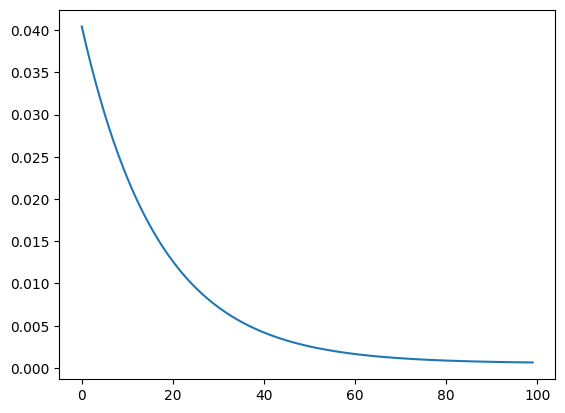

7.226729396011339e-10 1.000017193268935e-08 2.2094471540306463e-17


In [44]:
import autograd.numpy as np_
from autograd import grad
import matplotlib.pyplot as plt

erros = []

def erro(parametros):
    a,b,c,n,t_medido = parametros
    t = a*(n**2) + b*n + c
    return np_.mean((t - t_medido)**2)

n = np.array(lista_N).astype(float)
t = np.array(lista_t).astype(float)

A,B,C = 10**-10, 10**-8, 10**-18

alpha = 10**-17

g = grad(erro)

for _ in range(100):
    da, db, dc, dn, dt = g((A,B,C,n,t))
    A -= alpha * da
    B -= alpha * db
    C -= alpha * dc
    erros.append(erro((A,B,C,n,t)))

plt.figure()
plt.plot(erros)
plt.show()

print(A,B,C)

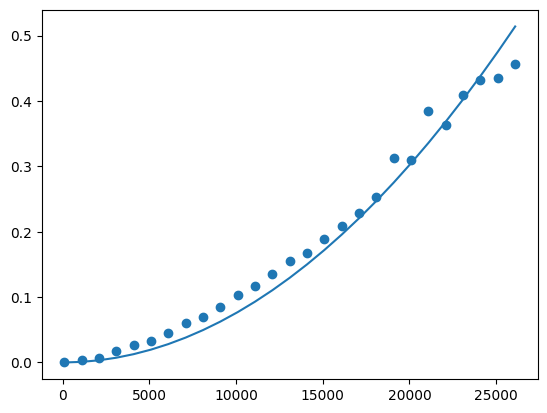

In [43]:
plt.figure()
plt.scatter(n, t)
plt.plot(n, A*(n**2) + B*n + C)
plt.show()

In [49]:
n = len(words)

t = A*(n**2) + B*n + C
print("Tempo para ler: ", t, " segundos")

Tempo para ler:  33.67674223315583  segundos


# Exercício 4

Um algoritmo promete comprimir a palavra `ABACATEIRO` em apenas 10 bits. Esse algoritmo é:

1. Mais, igualmente ou menos eficaz que o código de Huffman?
1. Possível ou impossível de acordo com o limite teórico dado pela entropia?

1. Ele é mais eficaz que o código de Huffman, pois este precisa de 30 bits para comprimir a palavra "ABACATEIRO", enquanto que o algoritmo citado no enunciado consegue comprimir a mesma palavra em 10 bits. Logo, este algoritmo é mais eficiente que o código de Huffman.

In [51]:
import numpy as np
import scipy.stats as stats

palavra = "ABACATEIRO"
probs = np.array(  [palavra.count(w) for w in set(palavra)])/len(palavra)
E = stats.entropy(probs)
print(E)

1.9730014063936128
